In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Tasks:

1. What was the best month for sales? How much was earned that month?
2. What time should we display advertisements to maximize the likelihood of purchases?
3. Which category sold most in that six month period?
4. Top 10 products sold most in that six month period?

In [2]:
df=pd.read_csv('OnlineOrders_of_a_ecommerce_website-Copy1.csv')

In [3]:
df.head()

,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,brand
0,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Alisha
1,2016-03-25 22:59:23+00:00,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor
2,2016-03-25 22:59:23+00:00,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,AW
3,2016-03-25 22:59:23+00:00,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Alisha
4,2016-03-25 22:59:23+00:00,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Sicons


## Q1: What was the best month for sales? How much was earned that month?

In [4]:

type(df['crawl_timestamp'].iloc[0])

str

In [5]:
import datetime as dt

In [6]:
df['crawl_timestamp']=pd.to_datetime(df['crawl_timestamp'])

In [7]:
type(df['crawl_timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df['crawl_timestamp'].iloc[0].year

2016

In [9]:
df['Month']=df['crawl_timestamp'].apply(lambda x:x.month)

In [10]:
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June'}

In [11]:
df['Month']=df['Month'].map(months)

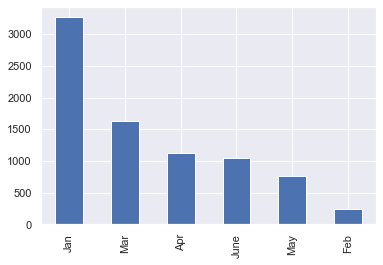

In [12]:
df['Month'].value_counts().plot.bar()

In [13]:
df.groupby('Month').sum()['discounted_price']['Jan']

20047084.0

## Ans1: January was the Best Month for sales with earning of Rs 20047084.0 /-

# ___________________________________________________________

## Q2: What time should we display advertisements to maximize the likelihood of purchases?

In [14]:
df['Time']=df['crawl_timestamp'].apply(lambda x:x.hour)

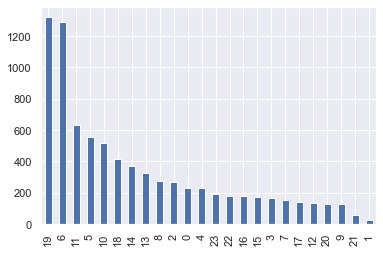

In [15]:
df['Time'].value_counts().plot.bar()

## Ans2: Morning 6am to 7am and Evening 7 pm to 8 pm would be right time to display advertisements

# _______________________________

## Q3: Which category sold most in that six month period?

In [16]:
def clear(x):
    return x.replace('["',' ').replace('"]',' ').split('>>')

In [17]:
df['clear_cat1']=df['product_category_tree'].apply(clear)

In [18]:
df['clear_cat1']=df['clear_cat1'].apply(lambda x:x[-1])

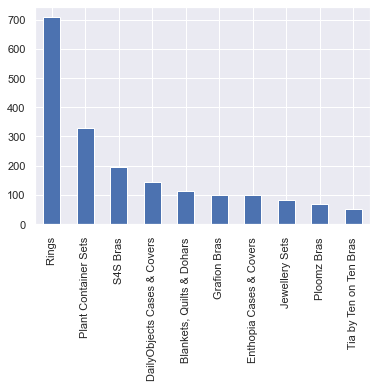

In [19]:
df['clear_cat1'].value_counts().head(10).plot.bar()

## Ans3: Ring category sold the most in that six months

# ___________________________________________________________

## Q4: Top 10 products sold most in that six month period?

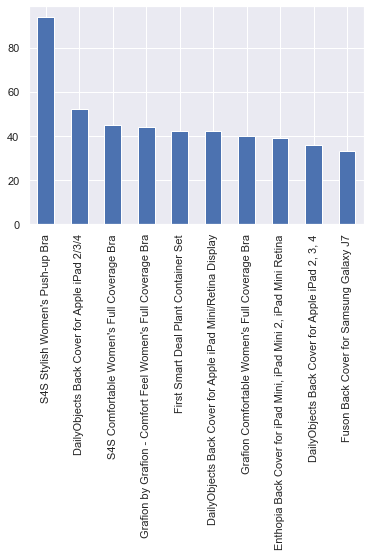

In [20]:
df['product_name'].value_counts().head(10).plot.bar()